In [1]:
# Python can perform viz using two packages:
# |---- a. Matplotlib package
# |---- b. seaborn package

In [2]:
# EDA
# |---- 1. Numerical EDA
# |---- 2. Visual EDA

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import the usual modules
import numpy as np

In [5]:
# Download the default dataset from seaborn
tips = sns.load_dataset("tips")

In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#####**Histogram / KDE**

<ipython-input-8-9fa674914785>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

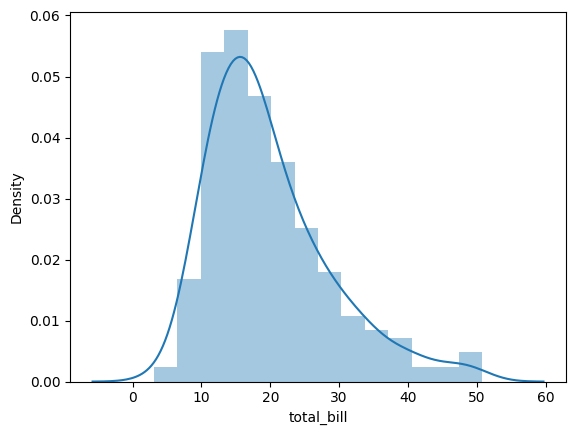

In [8]:
# Plotting the data (this method is usually applied on the data during the EDA phase)
# |---- Numerical Data
# |---- Categorical Data
#
# Special case:
# |---- while dealing with (Continuous) Numerical Data, use Distribution Plots like Histogram/KDE
# |---- distribution plots on historical numerical data
# |---- inference: by checking the `kde` plot, there may be an outlier

sns.distplot(tips['total_bill'])

#####**Box plot**

<Axes: xlabel='total_bill'>

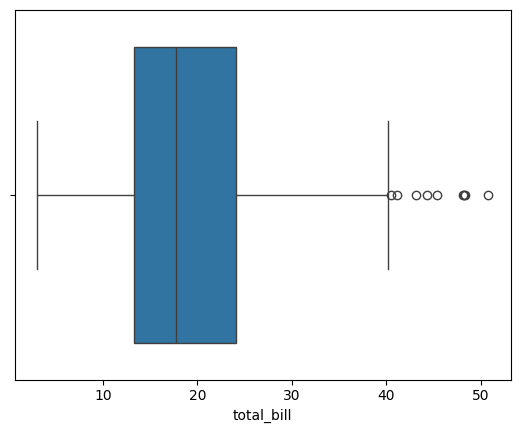

In [9]:
# From the above histogram, we get a suspicion, that there may exist outliers
# To check existence of outliers, we use:
# |---- Numerical EDA:
# |     |---- a. describe
# |     |---- b. 1.5 IQR Rule (Tukey's Rule)
# |
# |---- Visual EDA:
# |     |---- c. Box and Whiskers Plot
#
# Points on the box plot (left to right)
# |---- min (aka lower_range = Q1 - 1.5*IQR) <> Q1 <> median <> Q3 <> max (aka upper_range = Q3 + 1.5*IQR) <> outliers
# |---- mark their corresponding values on the x-axis

sns.boxplot(x=tips['total_bill'])

In [10]:
# Apply Box plot on all the numerical columns and compare the outcome with Tukey's Rule

In [11]:
def tukeys_rule(np_array):
  Q1 = np.quantile(tips['tip'], 0.25)
  Q2_ie_median = np.quantile(tips['tip'], 0.5)
  Q3 = np.quantile(tips['tip'], 0.75)
  IQR = Q3 - Q1
  lower_min = Q1 - 1.5 * IQR
  upper_max = Q3 + 1.5 * IQR
  print("lower:\t", lower_min)
  print("Q1:\t", Q1)
  print("median:\t", Q2_ie_median)
  print("Q3:\t", Q3)
  print("upper:\t",upper_max)

lower:	 -0.34375
Q1:	 2.0
median:	 2.9
Q3:	 3.5625
upper:	 5.90625



<Axes: xlabel='tip'>

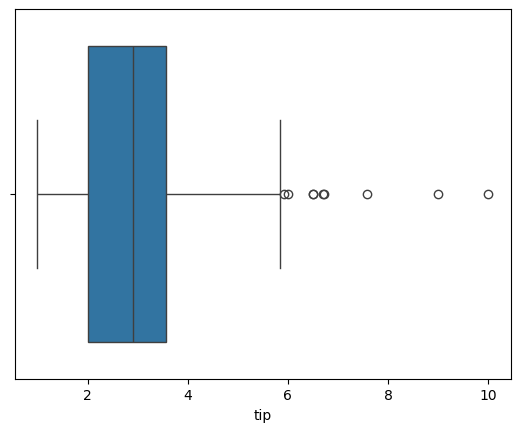

In [12]:
tukeys_rule(tips['tip'])
print()
sns.boxplot(x=tips['tip'])

lower:	 -0.34375
Q1:	 2.0
median:	 2.9
Q3:	 3.5625
upper:	 5.90625



<Axes: xlabel='size'>

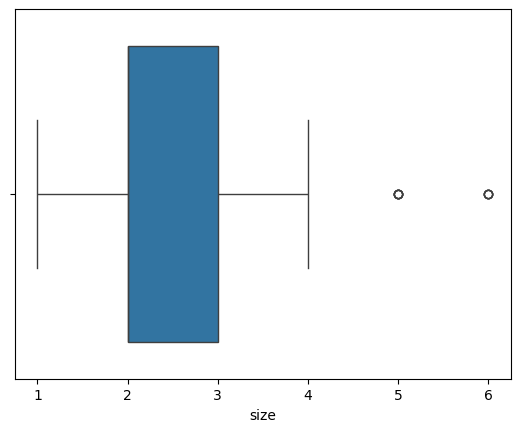

In [13]:
tukeys_rule(tips['size'])
print()
sns.boxplot(x=tips['size'])

#####**Visual Correlation Analysis**

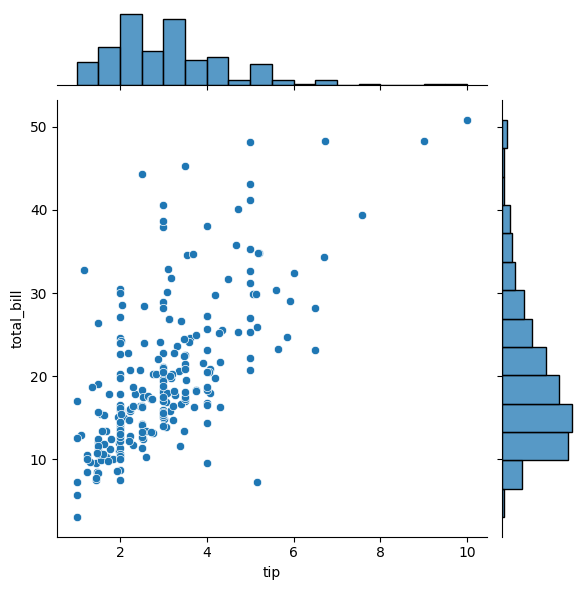

In [14]:
# For Numerical data you can (visually) perform Correlation using `jointplot`

sns.jointplot(x = tips['tip'] , y= tips['total_bill'])

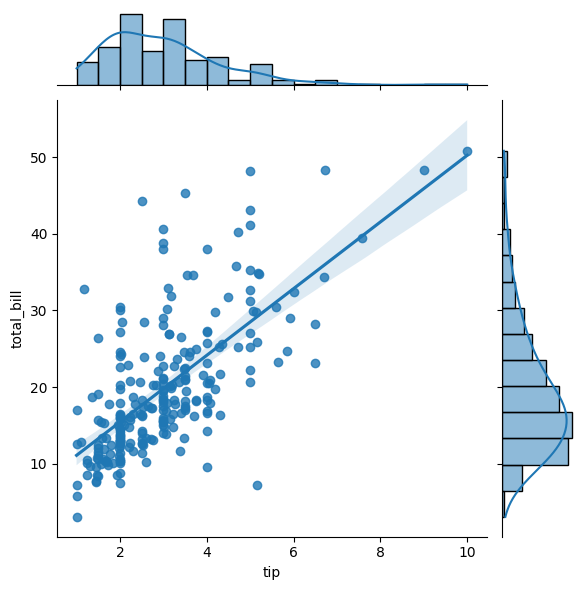

In [15]:
# add/plot regression

sns.jointplot(x = tips['tip'] , y= tips['total_bill'], kind='reg')

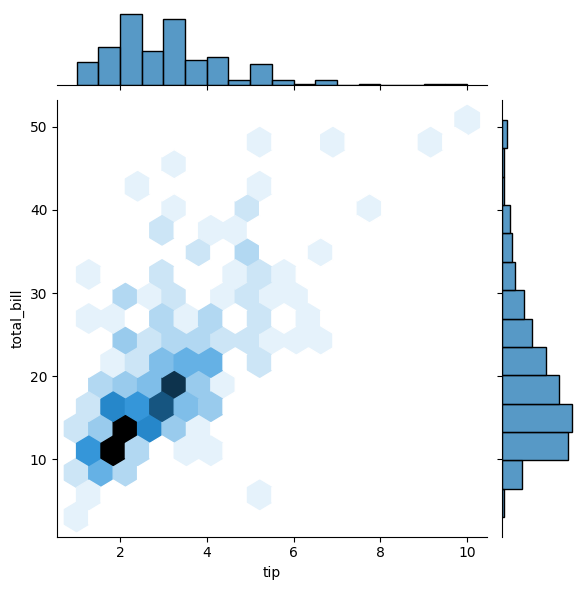

In [16]:
# hex/density plot

sns.jointplot(x = tips['tip'] , y= tips['total_bill'], kind='hex')

#####**Visualization for non numerical data**

In [17]:
# Types:
# |---- 1. Pie Chart
# |---- 2. Bar Plot
# |---- 3. Count Plot (prefer this type)

<Axes: xlabel='day', ylabel='count'>

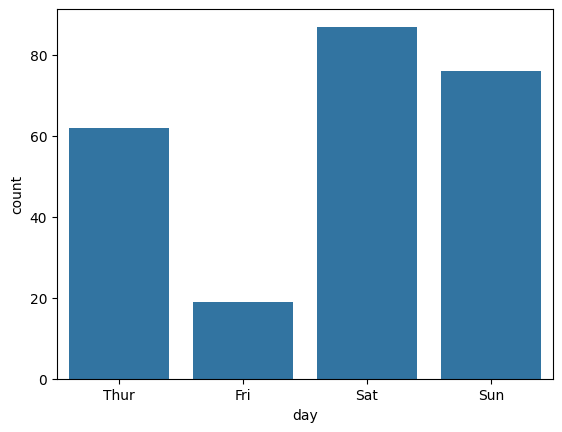

In [18]:
# which day has the maximum business?

sns.countplot(data=tips, x="day")

In [19]:
?sns.countplot

In [20]:
# unique values based on the time of visit

tips.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

Text(0, 0.5, 'DinnerCount')

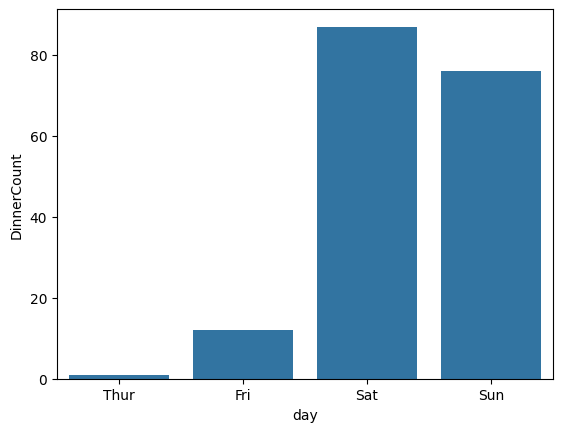

In [21]:
# which day has the maximum business for dinner?

sns.countplot(data=tips[ tips['time']=="Dinner" ], x="day")
plt.ylabel("DinnerCount")

<Axes: xlabel='day', ylabel='count'>

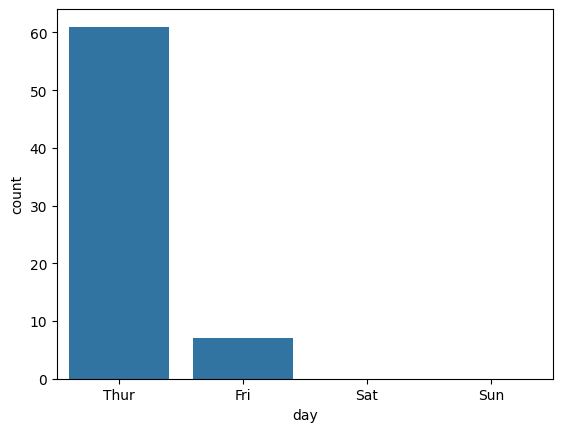

In [22]:
# which day has the maximum business for lunch?

sns.countplot(data=tips[ tips['time']=="Lunch" ], x="day")

<Axes: xlabel='day', ylabel='count'>

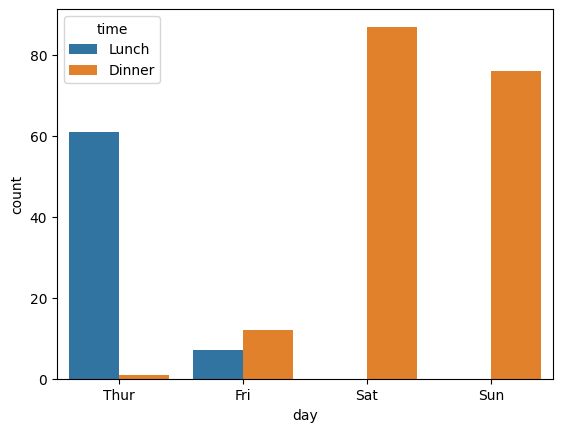

In [23]:
# stacked plot for lunch and dinner

sns.countplot(tips, x="day", hue="time")

<Axes: xlabel='day', ylabel='total_bill'>

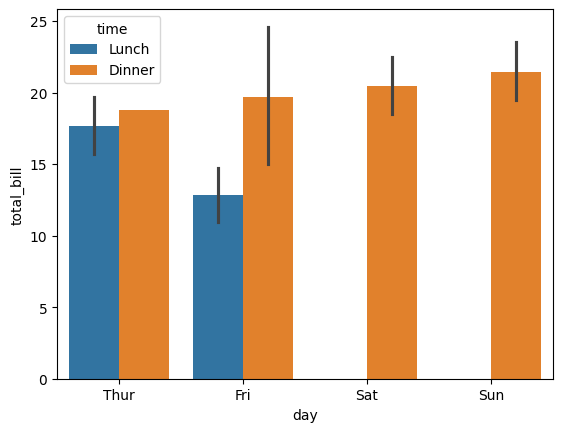

In [24]:
sns.barplot(data=tips, x="day" , y="total_bill", hue="time")